<a href="https://colab.research.google.com/github/CodeHunterOfficial/Practical-Time-Series-Analysis/blob/main/Section3_Building_the_first_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Регрессия

Прежде чем мы перейдем непосредственно к детальному изучению алгоритмов регрессии, несколько слов о том, какое вообще бывает машинное обучение.

## Обучение с учителем и без

Про машинное обучение с учителем (Supervised Machine Learning) говорят в том случае, когда в данных, на которых мы обучаем модель, уже заложен некоторый результат. Это может быть конкретное число (например, окружность шеи в задаче регрессии) или принадлежность к определенному классу (тип заемщика в задаче классификации). Другими словами, в этих данных есть зависимая переменная y.

В случае, если такого результата нет, речь идет об обучении без учителя (Unsupervised Machine Learning). Такой тип алгоритмов встречается в задаче кластеризации, когда нужно выделить группу или кластер объектов, но сами эти кластеры заранее не известны (в отличие от классов при классификации).

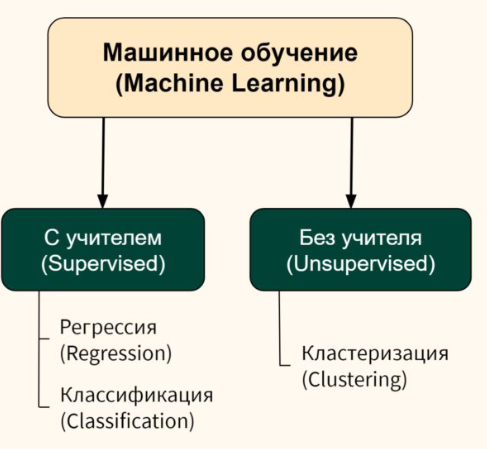

Теперь давайте поговорим откуда мы будем брать данные.

## Модуль datasets библиотеки Scikit-learn

В учебных целях мы будем использовать классические наборы данных, которые уже содержатся в библиотеке Scikit-learn в модуле datasets. Нас будут интересовать три набора данных:

Данные по 506 районам Бостона. Модель будет предсказывать цену на жилье.
Набор данных по 569 опухолевым образованиям, которые машина научится определять как злокачественные или доброкачественные.
Данные по 150 образцам цветов ириса. Мы попросим алгоритм разделить эти цветы на виды (или кластеры), основываясь на их характеристиках.

## Регрессия

### Этап 1. Загрузка данных — недвижимость в Бостоне

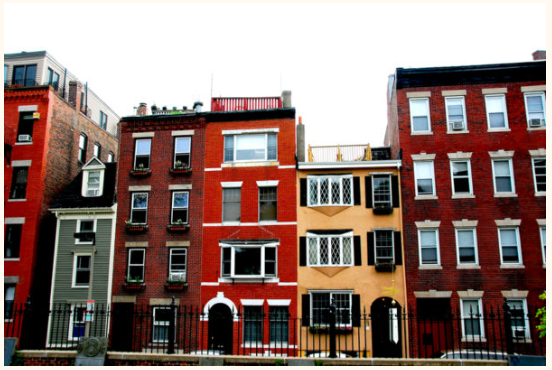

Вначале загрузим данные.

In [ ]:
# импортируем данные и поместим их в переменную boston
from sklearn.datasets import load_boston
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [ ]:
# определим тип данных
type(boston)

sklearn.utils.Bunch

Наш набор данных является объектом Bunch, который в свою очередь, представляет собой подкласс питоновского словаря. Это значит, что его структуру мы можем увидеть с помощью метода .keys().

In [ ]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

В разделе data содержится информация о признаках (независимые переменные. В target содержится целевая (зависимая) переменная, в feature_names — наименование признаков, а DESCR содержит описание датасета.

Начнем с общего обзора. Для этого прочитаем описание.

In [ ]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

.. _boston_dataset:

Набор данных о ценах на жилье в Бостоне
---------------------------

**Характеристики набора данных:**

    :Количество экземпляров: 506

    :Количество атрибутов: 13 числовых/категориальных предиктивных значений. Медианное значение (атрибут 14) обычно является целью.

    :Информация об атрибутах (по порядку):
        - ПРИМ на душу населения уровень преступности по городам
        - З.Н. доля земли под жилую застройку зонирована под участки площадью более 25 000 кв.м.
        - Доля INDUS акров неторгового бизнеса на город
        - фиктивная переменная CHAS Charles River (= 1, если участок граничит с рекой; 0 в противном случае)
        - Концентрация оксидов азота NOX (частей на 10 миллионов)
        - RM среднее количество комнат в жилом помещении
        - Доля AGE квартир, занимаемых владельцами, построенных до 1940 г.
        - Взвешенные DIS расстояния до пяти центров занятости Бостона
        - RAD индекс доступности к радиальным магистралям
        - НАЛОГ Полная ставка налога на имущество за 10 000 долларов США
        - Соотношение учеников и учителей PTRATIO по городам
        - B 1000 (Bk - 0,63) ^ 2, где Bk - доля чернокожих по городам.
        - LSTAT % более низкий статус населения
        - MEDV Средняя стоимость домов, занимаемых владельцами, в 1000 долларов США.

    : Отсутствующие значения атрибутов: нет

    :Создатель: Харрисон Д. и Рубинфельд Д.Л.

Это копия набора данных о жилье UCI ML.
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/


Этот набор данных был взят из библиотеки StatLib, которая поддерживается в Университете Карнеги-Меллона.

Данные о ценах на жилье в Бостоне Харрисона Д. и Рубинфельда Д.Л. «Гедонический
цены и спрос на чистый воздух», J. Environ. Экономика и менеджмент,
vol.5, 81-102, 1978. Используется в Belsley, Kuh & Welsch, «Регрессионная диагностика».
... ', Wiley, 1980. Н.Б. В таблице используются различные преобразования
страницы 244-261 последнего.

Данные о ценах на жилье в Бостоне использовались во многих работах по машинному обучению, посвященных регрессии.
проблемы.
     
.. тема:: Ссылки

   - Белсли, Кух и Уэлш, «Диагностика регрессии: выявление влиятельных данных и источников коллинеарности», Wiley, 1980. 244–261.
   - Куинлан, Р. (1993). Сочетание обучения на основе экземпляров и обучения на основе моделей. В материалах Десятой международной конференции по машинному обучению, 236–243, Массачусетский университет, Амхерст. Морган Кауфманн.

Каждая единица данных — это район города Бостон. У нас есть информация об уровне преступности (CRIM), качестве воздуха (NOX), транспортной доступности (RAD), налогах (TAX), количестве учителей (PTRATIO), социальном положении населения (LSTAT) и некоторые другие показатели. Целевой переменной является медианная цена недвижимости в каждом из районов (MEDV). Именно ее нам и нужно научиться предсказывать.

Давайте выведем информацию по первым пяти районам. Так как читать сырые данные (в формате массива Numpy) не очень удобно, мы преобразуем их в формат DataFrame из библиотеки Pandas.

In [ ]:
import pandas as pd
import numpy as np
# для этого передадим функции DataFrame массив признаков boston.data
# название столбцов возьмем из boston.feature_names
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
 
# выведем первые пять районов с помощью функции head()
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
# теперь добавим в таблицу целевую переменную и назовем ее MEDV
boston_df['MEDV'] = boston.target
 
# снова воспользуемся функцией head()
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**Важно!** 
>По этическим соображениям разработчики библиотеки удалят датасет load_boston из последующих версий. В этом случае сделайте следующее.

Шаг 1. Скачайте файл [boston.csv](https://www.dmitrymakarov.ru/wp-content/uploads/2022/04/boston.csv)

Шаг 2. [Загрузите файл](https://www.dmitrymakarov.ru/python/files-04/#2-etap-1-podgruzka-faylov-v-google-colab) в «Сессионное хранилище» в Google Colab.

Шаг 3. Запустите код ниже.

In [ ]:
# на выходе вы получите уже сформированный датафрейм
boston_df = pd.read_csv('/content/boston.csv')
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Посмотрим с каким типом переменных нам предстоит работать. От этого будет зависеть, какие статистические графики и инструменты мы будем применять при анализе данных.

In [ ]:
# посмотрим с каким типом переменных нам предстоит работать
# для этого есть метод .info()
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Как мы видим, все переменные, включая целевую, являются количественными (тип float). Помимо этого, мы можем посмотреть основные статистические показатели (summary statistics):

In [ ]:
# для этого воспользуемся методом .describe() и округлим значения
boston_df.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


В частности, мы видим количество наблюдений (count), среднее арифметическое (mean), среднее квадратическое отклонение (std), минимальное (min) и максимальное (max) значения, а также первый (25%), второй (50%) и третий (75%) квартиль (второй квартиль это то же самое, что медиана) каждой количественной переменной. Подробнее об этом мы поговорим, когда будем изучать анализ данных на более продвинутом уровне.

### Этап 2. Предварительная обработка данных

Данные редко поступают в идеальном виде. На этапе предварительной обработки данных (data pre-processing) нам необходимо понять:

* что мы будем делать с пропущенными значениями (missing values) и повторами (duplicates),
* как поступим с категориальными переменными (ведь компьютер не понимает, чем отличается одна категория от другой), и
* как не ухудшить модель из-за того, что диапазон или масштаб одной переменной сильно отличается от масштаба другой.

В работе с этим датасетом пока просто отметим, что пропущенные значения отсутствуют. Это видно из описания и, кроме того, мы можем посчитать пропущенные значения с помощью методов .isnull() и .sum().

In [ ]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Этап 3. Исследовательский анализ данных

Теперь выполним то, что часто называют исследовательским или разведочным анализом данных (Exploratory Data Analysis, EDA). По большом счету, от нас требуется понять какие взаимосвязи мы можем выявить между переменными, чтобы потом построить модель.

Основной инструмент, который нам доступен на данный момент, это корреляция независимых переменных (признаков, описывающих каждый район) с зависимой, целевой переменной (ценами на жилье). Напомню, что мы говорим о сильной корреляции, когда значение приближается к 1 или −1, и о ее отсутствии, когда значение близко к нулю.

In [ ]:
# посчитаем коэффициент корреляции для всего датафрейма и округлим значение
corr_matrix = boston_df.corr().round(2)
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


Такой способ представления корреляции называется корреляционной матрицей. В ней, в частности, мы видим (смотрите на последний столбец или строку), что переменные RM и LSTAT имеют достаточно сильную корреляцию с целевой переменной MEDV, 0,70 и −0,74, соответственно. Также умеренная корреляция наблюдается у переменных PTRATIO, TAX и INDUS.

Взаимосвязь двух переменных также можно визуализировать с помощью диаграммы рассеяния.

In [ ]:
# подготовим данные (поместим столбцы датафрейма в переменные)
x1 = boston_df['LSTAT']
x2 = boston_df['RM']
y = boston_df['MEDV']

Text(0.5, 1.0, 'Социальный статус населения и цены на жилье')

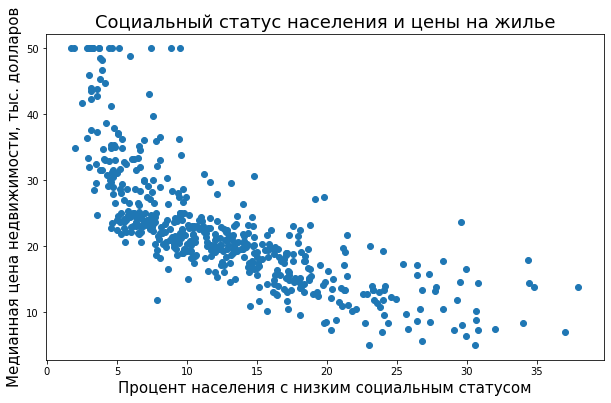

In [ ]:
import matplotlib.pyplot as plt
# зададим размер и построим первый график
plt.figure(figsize = (10,6))
plt.scatter(x1, y)
 
# добавим подписи
plt.xlabel('Процент населения с низким социальным статусом', fontsize = 15)
plt.ylabel('Медианная цена недвижимости, тыс. долларов', fontsize = 15)
plt.title('Социальный статус населения и цены на жилье', fontsize = 18)

Text(0.5, 1.0, 'Среднее количество комнат и цены на жилье')

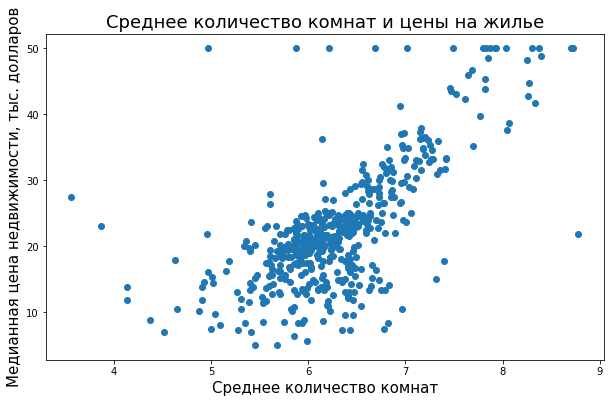

In [ ]:
# зададим размер и построим второй график
plt.figure(figsize = (10,6))
plt.scatter(x2, y)
 
# добавим подписи
plt.xlabel('Среднее количество комнат', fontsize = 15)
plt.ylabel('Медианная цена недвижимости, тыс. долларов', fontsize = 15)
plt.title('Среднее количество комнат и цены на жилье', fontsize = 18)

### Этап 4. Отбор и выделение признаков

После того, как мы собрали достаточно данных о взаимосвязи переменных, мы можем начать отбор наиболее значимых признаков (feature selection) и создание или выделение новых (feature extraction). В текущим исследовании, в частности, мы возьмем переменные RM, LSTAT, PTRATIO, TAX и INDUS, поскольку они имеют наиболее высокую корреляцию с целевой переменной MEDV. Создавать новые признаки мы пока не будем.

Поместим наши признаки в переменную X, а цены на жилье в переменную y.

In [ ]:
X = boston_df[['RM', 'LSTAT', 'PTRATIO', 'TAX', 'INDUS']]
y = boston_df['MEDV']

>Как мы видим, большая часть времени уходит именно на подготовительные этапы работы с данными, а не на обучение модели и составление прогноза. Это нормально. При работе с реальными данными их подготовка будет занимать еще больше времени.

##Этап 5. Обучение и оценка качества модели

Теперь, когда мы загрузили, обработали и исследовали данные, а также отобрали наиболее значимые признаки, мы готовы к обучению модели. Вначале разобьем данные на обучающую и тестовую выборки.

In [ ]:
# импортируем необходимый модуль
from sklearn.model_selection import train_test_split
 
# размер тестовой выборки составит 30%
# также зададим точку отсчета для воспроизводимости
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [ ]:
print(X_train, X_test, y_train, y_test)

        RM  LSTAT  PTRATIO    TAX  INDUS
5    6.430   5.21     18.7  222.0   2.18
116  6.176  12.04     17.8  432.0  10.01
45   5.682  10.21     17.9  233.0   6.91
16   5.935   6.58     21.0  307.0   8.14
468  5.926  18.13     20.2  666.0  18.10
..     ...    ...      ...    ...    ...
106  5.836  18.66     20.9  384.0   8.56
270  5.856  13.00     18.6  223.0   6.96
348  6.635   5.99     17.0  280.0   2.01
435  6.629  23.27     20.2  666.0  18.10
102  6.405  10.63     20.9  384.0   8.56

[354 rows x 5 columns]         RM  LSTAT  PTRATIO    TAX  INDUS
173  6.416   9.04     16.6  296.0   4.05
274  6.758   3.53     17.6  254.0   6.41
491  5.983  18.07     20.1  711.0  27.74
72   6.065   5.52     19.2  305.0  10.81
452  6.297  17.27     20.2  666.0  18.10
..     ...    ...      ...    ...    ...
441  6.406  19.52     20.2  666.0  18.10
23   5.813  19.88     21.0  307.0   8.14
225  8.725   4.63     17.4  307.0   6.20
433  6.436  16.22     20.2  666.0  18.10
447  6.251  16.44     20.2  666.0

Посмотрим на размерность новых наборов данных:

In [ ]:
# размерность обучающей
print(X_train.shape, y_train.shape)
 
# и тестовой выборки
print(X_test.shape, y_test.shape)

(354, 5) (354,)
(152, 5) (152,)


Теперь обучим модель и сделаем прогноз. Мы это уже делали [на прошлом занятии.](https://www.dmitrymakarov.ru/intro/train-test-13/)

In [ ]:
# из набора линейных моделей библиотеки sklearn импортируем линейную регрессию
from sklearn.linear_model import LinearRegression
 
# создадим объект этого класса и запишем в переменную model
model = LinearRegression()
 
# обучим нашу модель
model.fit(X_train, y_train)

LinearRegression()

In [ ]:

# на основе нескольких независимых переменных (Х) предскажем цену на жилье (y)
y_pred = model.predict(X_test)
 
# выведем первые пять значений с помощью диапазона индексов
print(y_pred[:5])

[26.62981059 31.10008241 16.95701338 25.59771173 18.09307064]


Осталось оценить качество модели. Посчитаем среднеквадратическую ошибку.

In [ ]:
# импортируем модуль метрик
from sklearn import metrics
 
# выведем корень среднеквадратической ошибки
# сравним тестовые и прогнозные значения цен на жилье
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error (RMSE): 5.107447670220913


Также рассчитаем новый для нас критерий качества — коэффициент детерминации ($R^2$ или R-квадрат). $R^2$ показывает, какая доля изменчивости целевой переменной объясняется с помощью нашей модели.

In [ ]:
print('R2:', np.round(metrics.r2_score(y_test, y_pred), 2))

R2: 0.65


В данном случае мы видим, что 65% изменчивости цены объясняется независимыми переменными, которые мы выбрали для нашей модели.

>Конечно, обе эти метрики можно улучшить, и именно такими улучшениями мы и будем заниматься на последующих курсах.

## Подведем итог
Сегодня мы выполнили первое полноценное исследование данных и построили модель. Мы (1) начали с того, что подгрузили данные из библиотеки Scikit-learn, (2) обработали и (3) исследовали данные, а также (4) отобрали наиболее значимые признаки. После этого мы (5) построили модель регрессии и оценили ее качество.

### Вопросы для закрепления

Чем обучение с учителем отличается от обучения без учителя?

**Ответ:** при обучении с учителем мы задаем нашей модели цель (y), к которой она должна стремиться в процессе оптимизации, при обучении без учителя такой цели нет.

Чем регрессия отличается от классификации?

**Ответ:** регрессия предсказывает число, классификация относит объекты к определенному классу

Что показывает коэффициент детерминации?

**Ответ:** коэффициент детерминации ($R^2$) показывает долю изменчивости целевой переменной (y), которую мы можем объяснить с помощью нашей модели. Если $R^2$ равен единице (100%), то наша модель полностью объясняет любые изменения в целевой переменной. Если $R^2$ равен нулю (0%), наша модель никак не объясняет эти изменения.

### Упражнения

**Подготовка и исследование данных**

**Задание 1.** Вновь загрузите данные по недвижимости в Бостоне.

**Задание 2**. Создайте датафрейм, добавьте целевую переменную и выведите первые семь строк.

**Задание 3.** Постройте точечную диаграмму с переменными PTRATIO и MEDV. Какие выводы можно сделать на основе этого графика?

**Построение и оценка качества модели**

**Задание 4.** Возьмите все признаки и поместите их в переменную X. Целевую переменную MEDV поместите в переменную y.

**Задание 5.** Разделите выборку на обучающую и тестовую части.

**Задание 6.** Постройте модель линейной регрессии. Сделайте прогноз и выведите первые три прогнозных значения.

**Задание 7.** Оцените качество модели через RMSE.

**Задание 8**. Оцените качество модели через $R^2$. Какую долю изменчивости целевой переменной объясняет модель, учитывающая все признаки?

### Ответы на вопросы


**Вопрос.** Скажите, а почему вы всегда используете число 42, например, в random_state = 42 и в np.random.seed(42)?

**Ответ.** Никакой технической необходимости указывать число 42 нет, оно может быть любым.

Это число очень часто используется в проектах по Data Science и взято из романа Дугласа Адамса «Автостопом по галактике» (The Hitchhiker’s Guide to the Galaxy. По сюжету, один из героев книги ищет ответ на Главный вопрос жизни, вселенной и всего такого. Через семь с половиной миллонов лет непрерывных вычислений специально созданный для этих целей компьютер «Думатель» (Deep Thought) выдал ответ. Этим ответом и было число 42.

Если в Гугле ввести Answer to the Ultimate Question of Life, the Universe, and Everything, то в результате поиска появится калькулятор с числом 42.



**Вопрос.** Выполнив упражнение после [лекции], получил, как мне кажется, немного странный результат: RMSE уменьшилось, а  $R^2$ увеличился. Не могли бы вы подсказать, нормально ли это? Заранее спасибо за ответ.

**Ответ.** Спасибо за вопрос. Да, это нормально. Уменьшение RMSE показывает, что наша модель ($\hat{y}_{(i)}$) стала меньше отклоняться от фактических значений ($y_{(i)}$).

Одновременно, после добавления новых признаков/зависимых переменных модель смогла лучше объяснить изменчивость целевой переменной (цены на жилье). Это отразилось на увеличении коэффициента детерминации $R^2$.

Продемонстрирую на формулах. Вот как мы рассчитываем RMSE.

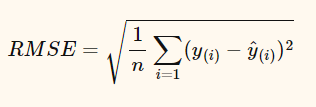

Мы считаем квадрат отклонения фактических значений от прогнозных, усредняем и извлекаем квадратный корень. Теперь давайте посмотрим на формулу $R^2$.

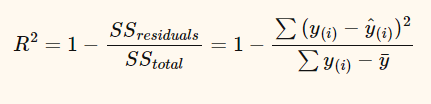

В данном случае мы делим сумму квадратов отклонений от прогнозных значений $SS_{residuals}$ на сумму квадратов отклонений от $SS_{total}$ среднего  и вычитаем получившийся результат из единицы. В [Википедии](https://en.wikipedia.org/wiki/Coefficient_of_determination) есть хорошая иллюстрация этой метрики.

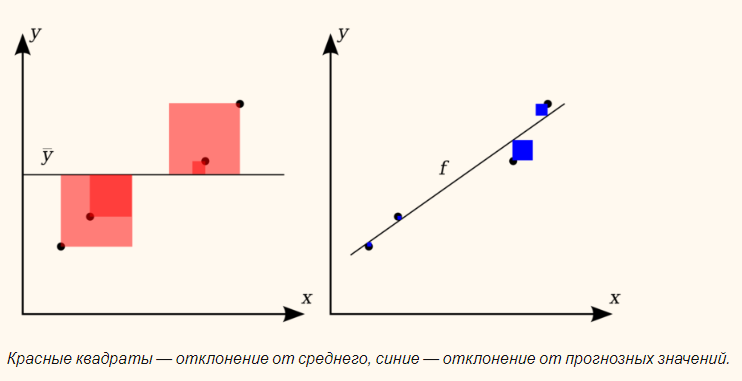

Обратите внимание, что RMSE и числитель в формуле $R^2$ — это почти одно и то же.

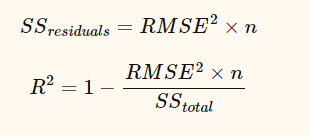

Если мы уменьшаем RMSE, то соответственно уменьшаем числитель дроби и увеличиваем $R^2$. Другими словами, логично, что если мы смогли уменьшить RMSE (то есть наша модель лучше описывает данные), то она их и лучше объясняет.

Может показаться, что RMSE и $R^2$ дублируют друг друга с тем отличием, что RMSE измеряет ошибку в абсолютных значениях, а коэффициент детерминации объясняет изменчивость в процентах. Однако здесь есть один нюанс. Добавление новых признаков увеличивает, но никогда не уменьшает коэффициент детерминации. Для этого есть две причины:

При любом количестве признаков знаменатель (то есть $SS_{total}$ ) остается неизменным, потому что зависит только от целевой переменной.

Одновременно, при обучении модели (то есть подборе коэффициентов), алгоритм, если новый признак ухудшает $R^2$, может придать этому коэффициенту значение ноль и не включать его в финальную модель. Например, в модели $\hat{y}=\beta_0+\beta_1x_+\beta_2 x_2+\beta_3 x_3$
 придать коэффициенту $\beta_3$ значение ноль и, таким образом, исключить его. Значит числитель дроби может $R^2$ только уменьшаться, а  только увеличиваться. Зачастую такое увеличение $R^2$  вызвано случаем и не улучшает качество модели.

Как следствие, возникает желание увеличивать количество признаков в погоне за большим коэффициентом детерминации. Для того чтобы этому противостоять, используется скорректированный $R^2$  (adjusted $R^2$).

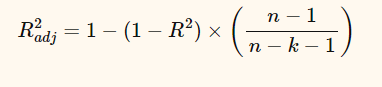

где k — это количество признаков, а n — количество наблюдений.

При увеличении количества признаков знаменатель увеличивается, уменьшает дробь и, как следствие, понижает весь коэффициент детерминации. И только если новый признак действительно вносит существенный вклад в качество модели, новый скорректированный коэффициент детерминации вырастет.

Именно поэтому полезно измерять как RMSE, чтобы понимать, насколько ваша модель в абсолютных значениях отклоняется от факта, так и скорректированный $R^2$, чтобы понимать, с учетом количества признаков, насколько хорошо модель объясняет изменчивость целевой переменной.

Рассчитаем $R^2_{abj}$  для модели из лекции.

In [ ]:
# возьмем n и k для тестовых данных
n, k = X_test.shape[0], X_test.shape[1]
n, k

(152, 5)

In [ ]:
# подставим их в формулу
1 - (1 - model.score(X_test, y_test)) * ((n - 1) / (n - k - 1))

0.6379243352311836

Как вы видите, мы были «наказаны» (penalized) за наличие пяти признаков в модели. При построении модели из упражнения, думаю, коэффициент детерминации будет скорректирован еще сильнее.

# Классификация

На прошлом занятии мы говорили про регрессию. Теперь давайте поговорим про задачи классификации. 

### Этап 1. Загрузка данных — классификация опухолей

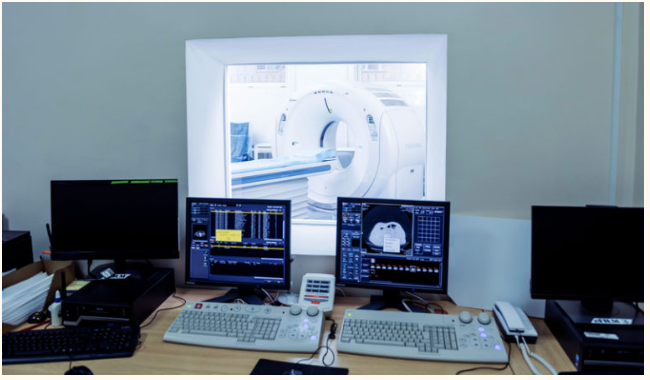

Данные мы все также возьмем из датасета библиотеки Scikit-learn. Вначале загрузим их.

In [34]:
# импортируем данные и поместим их в переменную cancer
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

Этот датасет состоит из тех же частей, что и данные по [недвижимости в Бостоне](https://www.dmitrymakarov.ru/intro/regression-14/#3-etap-1-zagruzka-dannykh-nedvizhimost-v-bostone). Добавился только компонент target_names, в котором содержатся названия целевых классов. Давайте сразу посмотрим на описание этого датасета.

In [35]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Как мы видим здесь собраны данные по 569 образованиям, которые могут быть злокачественными (раком груди) либо доброкачественными.

* Для каждой из 10 базовых характеристик опухоли (таких как, радиус, текстура, периметр, площадь и т.д.) рассчитаны три значения (среднее арифметическое, СКО и среднее трёх наибольших значений). Таким образом, получается 30 параметров или признаков.
* Помимо этого, каждое образование классифицировано как злокачественное или доброкачественное.

Наша задача заключается в том, чтобы построить модель, которая, используя эти признаки (все или часть из них), сможет с высокой долей уверенности говорить о том, злокачественная перед нами опухоль или нет.

Преобразуем наши данные в формат датафрейма.

In [36]:
# cоздадим датафрейм
# названия столбцов возьмем из cancer.feature_names
cancer_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
 
# добавим целевую переменную
cancer_df['target'] = cancer.target
 
# посмотрим на первые пять наблюдений
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


>Когда вы работаете над новым датасетом, очень важно идти от логики исследования и того результата, который хотите получить. Если вы знаете, что вы хотите получить, то всегда напишете код, который решит поставленную задачу.

**Целевая переменная** обозначается как ноль и один. Посмотрим, какой цифрой обозначается доброкачественная опухоль, а какой — злокачественная.

In [37]:
# расшифруем 0 и 1 в значениях целевой переменной
# для этого посчитаем сколько раз встречается 0 и сколько раз встречается 1
unique, counts = np.unique(cancer.target, return_counts = True)
unique, counts

(array([0, 1]), array([212, 357]))

Из описания мы знаем, что в датасете 212 злокачественных опухолей и 357 доброкачественных. Получается, что ноль означает злокачественное образование, а единица — доброкачественное.

Изучим тип переменных, с которыми нам предстоит работать.

In [38]:
# посмотрим на тип переменных, используя метод .info()
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Все зависимые переменные — количественные. Целевая переменная — категориальная, однако что важно, обозначена числовым значением (0 и 1).

Посмотрим на основные статистические показатели (summary statistics):

In [39]:
# для этого воспользуемся методом .describe() и округлим значения
cancer_df.describe().round(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,0.06,...,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08,0.63
std,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,0.01,...,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02,0.48
min,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,0.05,...,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06,0.00
25%,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,0.06,...,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07,0.00
50%,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,0.06,...,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08,1.00
75%,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,0.07,...,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09,1.00
max,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,0.10,...,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21,1.00


###Этап 2. Предварительная обработка данных
**Пропущенные значения**

Вначале посмотрим на пропущенные значения. Если в наборе данных пропущен существенный процент значений, то мы не сможем построить корректную модель.

In [40]:
# воспользуемся функциями isnull() и sum()
cancer_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

Пропущенных значений нет. Мы также могли видеть это в результате метода .info(), сравнив диапазон значений с количеством значений каждой переменной.

### Преобразование категориальных переменных
Как уже было сказано, наша целевая категориальная переменная записана числами. Если бы вместо них стояли, например, слова «Да»/ «Нет», или «Злокачественное»/ «Доброкачественное», нам бы пришлось превратить эти строковые значения в цифры. Делается это из-за того, что модель не умеет оперировать словами. Она просто не сможет подобрать веса.

###Нормализация данных
Помимо пропущенных значений и строковых категорий при обучении модели может возникнуть еще одна сложность. Если масштаб различных признаков сильно различается, модель может придать больше значимости признаку с большим масштабом.

Например, мы видим, что mean texture имеет разброс от 9,71 до 39,28. При этом mean area находится в диапазоне от 143,50 до 2501,00. Значит ли это, что mean area важнее для нашей модели? Не обязательно. Однако в силу особенностей алгоритма модель может отдать предпочтение (больший вес) именно этому признаку.

Для того чтобы этого не произошло данные нужно нормализовать или привести к единому масштабу (normalization, feature scaling).

In [41]:
# приведем все независимые переменные к единому масштабу
 
# снова создадим датафрейм без целевой переменной 
cancer_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
 
# импортируем необходимый класс из модуля preprocessing библиотеки sklearn
from sklearn.preprocessing import StandardScaler
 
# создадим объект этого класса
scaler = StandardScaler()
 
# приведем данные к единому масштабу 
scaled_data = scaler.fit_transform(cancer_df)

В переменную scaled_data был записан массив Numpy. Его нужно вновь преобразовать в датафрейм.

In [42]:
# преобразуем scaled_data обратно в датафрейм
cancer_df_scaled = pd.DataFrame(scaled_data, columns = cancer.feature_names)
 
# вновь добавим целевую переменную
cancer_df_scaled['target'] = cancer.target
 
# посмотрим на результат (только два первых значения)
cancer_df_scaled.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0


In [43]:
# а также на основные статистическое показатели (масштаб должен быть другим!)
cancer_df_scaled.describe().round(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,...,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.63
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.48
min,-2.03,-2.23,-1.98,-1.45,-3.11,-1.61,-1.11,-1.26,-2.74,-1.82,...,-2.22,-1.69,-1.22,-2.68,-1.44,-1.31,-1.75,-2.16,-1.60,0.00
25%,-0.69,-0.73,-0.69,-0.67,-0.71,-0.75,-0.74,-0.74,-0.70,-0.72,...,-0.75,-0.69,-0.64,-0.69,-0.68,-0.76,-0.76,-0.64,-0.69,0.00
50%,-0.22,-0.10,-0.24,-0.30,-0.03,-0.22,-0.34,-0.40,-0.07,-0.18,...,-0.04,-0.29,-0.34,-0.05,-0.27,-0.22,-0.22,-0.13,-0.22,1.00
75%,0.47,0.58,0.50,0.36,0.64,0.49,0.53,0.65,0.53,0.47,...,0.66,0.54,0.36,0.60,0.54,0.53,0.71,0.45,0.45,1.00
max,3.97,4.65,3.98,5.25,4.77,4.57,4.24,3.93,4.48,4.91,...,3.89,4.29,5.93,3.96,5.11,4.70,2.69,6.05,6.85,1.00


Как мы видим, масштаб переменных изменился. Теперь у них у всех одинаковое среднее арифметическое (ноль) и одинаковое СКО (единица).

>Нормализацию данных лучше производить после того, как мы разобьем нашу выборку на обучающую и тестовую часть. Для простоты кода сегодня мы сделаем наоборот.

###Этап 3. Исследовательский анализ данных
Приступим к исследовательскому анализу данных (Exploratory Data Analysis, EDA). Как уже было сказано на прошлом занятии, от нас требуется выявить взаимосвязь между зависимой и независимыми переменными.

В данном случае речь идет о взаимосвязи количественных и категориальной переменной. Вот какие варианты выявления такой взаимосвязи у нас есть:

* Мы можем количественно оценить насколько будут отличаться основные статистические показатели (например, среднее арифметическое) для каждой из переменных в зависимости от класса.
* Мы можем графически построить две гистограммы на одном графике, как мы уже делали раньше.
* В рамках более продвинутого анализа мы можем оценить статистическую значимость такого различия.

На сегодняшнем занятии займемся первым и вторым пунктами.

In [44]:
# сгруппируем данные по целевой переменной, рассчитаем среднее и перевернем (транспонируем) наш датафрейм
# все это последовательно делается с помощью group_by, mean() и .T
data = cancer_df_scaled.groupby('target').mean().T
 
# выведем первые два значения, чтобы убедиться в верности результата
data.head(2)

target,0,1
mean radius,0.947340,-0.562566
mean texture,0.538776,-0.319945


Как мы видим, теперь в строках содаржатся наши признаки и соответствующие им средние значения, разбитые на две группы (среднее значение для злокачественной опухоли и среднее для доброкачественной). Теперь давайте посчитаем разницу и вычислим модуль. Так мы сможем сравнивать получившиеся значения между собой.

In [45]:
# вычтем одну колонку из другой и вычислим модуль
# синтаксис может показаться сложным, пока не обращайте на это внимания
data['diff'] = abs(data.iloc[:, 0] - data.iloc[:, 1])
 
# остается отсортировать наш датафрейм по столбцу разницы средних в нисходящем порядке
data = data.sort_values(by = ['diff'], ascending = False)
 
# и вывести те значения (пусть их будет 10), где разница наиболее существенная
data.head(10)

target,0,1,diff
worst concave points,1.029791,-0.611529,1.641320
worst perimeter,1.015969,-0.603320,1.619289
mean concave points,1.007793,-0.598465,1.606258
worst radius,1.007585,-0.598342,1.605927
mean perimeter,0.963700,-0.572281,1.535981
worst area,0.952267,-0.565492,1.517759
mean radius,0.947340,-0.562566,1.509906
mean area,0.920031,-0.546349,1.466380
mean concavity,0.903649,-0.536621,1.440270
worst concavity,0.855960,-0.508301,1.364261


Эту разницу в средних значениях и в целом в распределении переменной мы можем также увидеть на совмещенных гистограммах. Давайте построим такие гистограммы для признака с наибольшей разницей средних worst concave points.

Text(0.5, 1.0, 'Распределение worst concave points для двух типов опухолей')

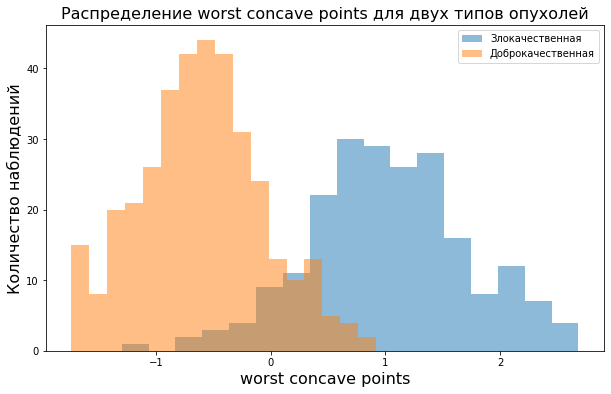

In [46]:
# задаем количество интервалов
bins = 17
 
# и размер графика
plt.figure(figsize = (10,6))
 
# из датафрейма cancer_df_scaled выберем столбец 'worst concave points'
# и только те строки, где target == 0 (злокачественная)
plt.hist(cancer_df_scaled.loc[cancer_df_scaled['target'] == 0, 'worst concave points'], bins, alpha = 0.5, label = 'Злокачественная')
 
# то же самое, но target == 1 (доброкачественная)
plt.hist(cancer_df_scaled.loc[cancer_df_scaled['target'] == 1, 'worst concave points'], bins, alpha = 0.5, label = 'Доброкачественная')
plt.legend(loc = 'upper right')
 
# добавим подписи и размер шрифта
plt.xlabel('worst concave points', fontsize = 16)
plt.ylabel('Количество наблюдений', fontsize = 16)
plt.title('Распределение worst concave points для двух типов опухолей', fontsize = 16)


Как мы видим, распределение признака отличается для злокачественных и доброкачественных образований.

###Этап 4. Отбор и выделение признаков

На основе проведенного EDA, давайте возьмем десять признаков в наибольшими отличиями среднего арифметического в зависимости от значения целевой переменной. Таким образом, в нашу модель войдут: worst concave points, worst perimeter, mean concave points, worst radius, mean perimeter, worst area, mean radius, mean area, mean concavity, worst concavity.

Давайте поместим наши признаки в переменную X, а классы в переменную y. Для этого возьмем названия признаков из индекса нашего вспомогательного датафрейма data, преобразуем их в список и сделаем срез по первым 10 значениям (и все это для того, чтобы не набирать названия столбцов вручную).

Результат запишем в переменную features.

In [47]:
features = list(data.index[:10])
print(features)

['worst concave points', 'worst perimeter', 'mean concave points', 'worst radius', 'mean perimeter', 'worst area', 'mean radius', 'mean area', 'mean concavity', 'worst concavity']


Теперь отфильтруем исходный датафрейм по этим признакам. Переменная features и будет нашим фильтром.

In [48]:
X = cancer_df_scaled[features]

В переменную y запишем классы.

In [49]:
y = cancer_df_scaled['target']

Разумеется задачи отбора и выделения признаков (feature selection and feature extraction) и конструирования признаков (feature engineering) намного шире и сложнее. Пока мы только начинаем знакомиться с этими инструментами.

###Этап 5. Обучение и оценка качества модели
Разделение на обучающую и тестовую выборки
Прежде всего разобьем наши данные на обучающую и тестовую выборки.

In [50]:
# импортируем необходимый модуль
from sklearn.model_selection import train_test_split
 
# размер тестовой выборки составит 30%
# также зададим точку отсчета для воспроизводимости результата
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

**Обучение модели и прогноз**

Задача классификации решается с помощью множества различных алгоритмов. Сегодня мы будем использовать логистическую регрессию (logistic regression).

Обратите внимание, что хотя в названии присутствует слово «регрессия», модель логистической регрессии решает задачу классификации.

In [51]:
# импортируем логистическую регрессию из модуля linear_model библиотеки sklearn
from sklearn.linear_model import LogisticRegression
 
# создадим объект этого класса и запишем его в переменную model
model = LogisticRegression()
 
# обучим нашу модель
model.fit(X_train, y_train)
 
# выполним предсказание класса на тестовой выборке
y_pred = model.predict(X_test)

**Оценка качества модели**

Те метрики, которые мы использовали для оценки качества модели регрессии, здесь, разумеется, не подойдут. Нужны новые.

Вначале построим матрицу ошибок (confusion matrix). Она в целом покажет, сколько наблюдений были правильно и неправильно классифицированы как злокачественные, и сколько — как доброкачественные. Схематично это выглядит так:

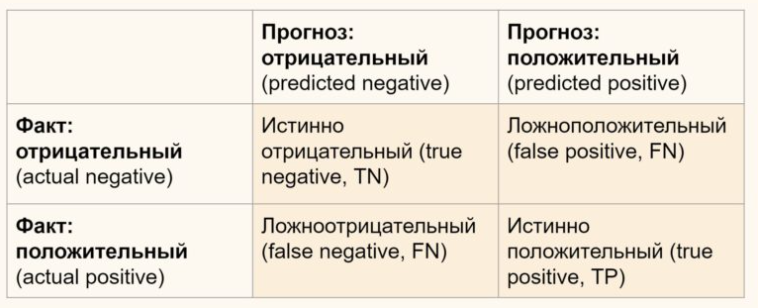

Теперь построим такую матрицу на основе прогнозных значений нашей модели.

In [52]:
# построим матрицу ошибок
from sklearn.metrics import confusion_matrix
 
# передадим ей тестовые и прогнозные значения
# поменяем порядок так, чтобы злокачественные опухоли были положительным классом
model_matrix = confusion_matrix(y_test, y_pred, labels = [1,0])
 
# для удобства создадим датафрейм
model_matrix_df = pd.DataFrame(model_matrix)
model_matrix_df

,0,1
0,104,4
1,2,61


Мы сделали злокачественные опухоли положительным классом (единица), потому что обычно в медицине под положительным результатом подразумевается выявление заболевания.

In [53]:
# добавим подписи к столбцам и строкам через параметры columns и index
# столбец - это прогноз, строка - фактическое значение
# 0 - добр. образование, 1 - злок. образование (только в рамках матрицы ошибок!)
model_matrix_df = pd.DataFrame(model_matrix, columns = ['Прогноз добр.', 'Прогноз злок.'], index = ['Факт добр.', 'Факт злок.'])
model_matrix_df

,Прогноз добр.,Прогноз злок.
Факт добр.,104,4
Факт злок.,2,61


Как мы видим, модель допустила шесть ошибок:

* Две опухоли она классифицировала как доброкачественные, хотя на самом деле это не так
* Кроме того, четыре доброкачественные опухоли были помечены как злокачественные
* Остальные значения предсказаны верно

Доля правильно предсказанных значений называется accuracy. Чтобы ее посчитать, мы берем те значения, которые предсказаны верно (TP + TN) и делим на общее количество прогнозов.

$$accuracy=\frac{TP+TN}{TP+TN+FP+FN}$$

>Так как существует определенная путаница в терминологии на русском языке, здесь и далее для метрик моделей классификации мы будем использовать только английские термины.

In [54]:
# рассчитаем accuracy или долю правильных прогнозов
round((61 + 104)/(61 + 104 + 2 + 4), 2)

0.96

Мы также можем воспользоваться встроенной в sklearn метрикой.

In [55]:
from sklearn.metrics import accuracy_score
 
model_accuracy = accuracy_score(y_test, y_pred)
round(model_accuracy, 2)

0.96

Итак, наша модель предсказывает верный результат в 96% случаев. Кажется, что это очень хорошо. Однако, есть одна проблема. С точки зрения медицины и здравого смысла мы больше всего боимся того, что модель не сможет распознать злокачественное образование, и нас прежде всего интересует минимизация ложноотрицательныго результата, когда пациенту с онкологией мы говорим, что не стоит волноваться. Показатель accuracy не дает этой информации.

Хотя сегодня мы не будем сильнее углубляться в эту тему, скажу, что в каждом конкретном случае нужно выбирать наиболее подходящую с точки зрения решаемой задачи метрику.

###Подведем итог

Мы проделали большую работу.

1. После загрузки данных мы создали датафрейм, изучили переменные, а также 
посмотрели на основные статистические показатели.
2. Обработка данных предполагала изучение пропущенных значений, кодировку категориальных переменных и нормализацию данных.
3. Исследовательcкий анализ данных позволил выявить взаимосвязь нескольких независимых переменных и целевых классов.
4. В рамках отбора и выделения признаков мы взяли 10 наиболее значимых признаков.
5. Затем мы разделили выборку на обучающую и тестовую, обучили модель логистической регрессии и сделали прогноз. При оценке результата мы столкнулись с тем, что в случае задачи классификации доля правильных прогнозов не всегда отражает качество модели.

### Вопросы для закрепления

Какие три задачи нужно решить при предварительной обработке данных?

**Ответ:** (1) обработать пропущенные значения, (2) убедиться, что категориальные данные обозначены числом и (3) нормализовать или масштабировать данные

Какая задача решается в рамках исследовательского анализа данных (EDA)?

**Ответ:** главным образом, от нас требуется выявить взаимосвязь между признаками и зависимой переменной

Почему accuracy не всегда позволяет адекватно оценить качество модели?

**Ответ:** в зависимости от типа задачи классификации, мы можем стремиться не только увеличить долю правильно предсказанных значений (accuracy), но и минимизировать, например, ложноположительные или ложноотрицательные прогнозы

### Упражнения

###Подготовка и исследование данных

**Задание 1.** Вновь загрузите данные по опухолевым образованиям. Создайте датафрейм, добавьте целевую переменную, выведите последние пять строк датафрейма (для этого используйте функцию .tail()).

**Задание 2.** Проведите нормализацию данных и выведите первые пять значений нормализованного набора данных.

**Задание 3.** Графически оцените распределение переменной worst perimeter для двух типов опухолей.

###Построение и оценка качества модели

**Задание 4.** Возьмите все признаки и поместитие их в переменную X, целевую переменную поместите в переменную y.

**Задание 5.** Разделите данные на обучающую и тестовую части.

**Задание 6.** Постройте модель логистической регрессии и сделайте прогноз.

**Задание 7.** Постройте матрицу ошибок, не забудьте про подписи к строкам и столбцам. Какие выводы можно сделать?

**Задание 8.** Оцените accuracy результата вручную и с помощью модуля metrics.

###Ответы на вопросы
**Вопрос.** Почему правильно проводить нормализацию данных после разделения на train и test?

**Ответ.** При разделении на обучающую (train) и тестовую (test) выборки самое главное — избежать их взаимного влияния друг на друга. В противном случае, мы не сможем объективно оценить качество модели.

Эту проблему также называют проблемой утечки данных (data leakage).

Если говорить про решение этой задачи с помощью библиотеки sklearn, то, например, у класса StandardScaler есть методы fit, transform и fit_transform. Метод fit рассчитывает среднее арифметическое и СКО для масштабирования данных, transform их применяет. Метод fit_transform сразу делает и то, и другое.

На практике, мы могли бы (1) применить метод fit_transform к обучающей выборке (train dataset). Это даст нам необходимые среднее арифметическое и СКО (fit), которые затем позволят масштабировать эти данные (transform). После этого (2) мы можем применить полученные с помощью fit параметры для масштабирования уже тестовых данных (test dataset).

В этом случае тестовые данные не повлияют на масштабирование обучающей выборки. Другими словами, не произойдет той самой утечки данных.

Приведу пример на Питоне. Предположим, вы уже поместили ваши данные в переменные X и y.

In [57]:
# тогда вначале делим данные на train и test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
 
# создаем объект класса StandardScaler()
scaler = StandardScaler()
 
# масштабируем обучающую выборку
X_train_scaled = scaler.fit_transform(X_train)
 
# обучаем модель на масштабированных train данных
model = LogisticRegression().fit(X_train_scaled, y_train)
 
# используем среднее арифметическое и СКО обучающей выборки для масштабирования тестовых данных
X_test_scaled = scaler.transform(X_test)
 
# делаем прогноз
y_pred = model.predict(X_test_scaled)

**Вопрос.** Запутался с терминологией. Встречал в других источниках, что приведение данных к одному масштабу, которое описывается в этой статье, называют стандартизацией или z-преобразованием. А нормализацией — когда данные масштабируются в диапазон от 0 до 1.

Есть ли чёткие определения у этих масштабирований в русском языке или, чтобы не путаться, лучше пользоваться оригинальными наименованиями типа StandardScaler, MinMaxScaler и другие?

**Ответ.** Я думал над этим вопросом. На самом деле есть некоторая путаница в самих источниках. Я руководствовался двумя статьями.

(1) Статья в [Википедии](https://en.wikipedia.org/wiki/Normalization_(statistics)), которая, в свою очередь, ссылается на Оксфордский словарь, обозначает нормализацию как наиболее общий термин.

Нормализация же включает:

Нормализация же включает:

* **стандартизаци**ю (standartization) или как еще говорят нормализацию по z-оценке (z-score normalization), т.е. изменение данных таким образом, чтобы их среднее (mean) было равно нулю, а СКО (standard deviation) — единице
* **min-max нормализацию**, т.е. приведение данных к определенному диапазону; кстати, диапазон не обязательно должен быть от 0 до 1, на занятии по нейросетям мы, например, приводим данные к диапазону от −1 до 1 (общая формула приведена ниже)
* и другие методы

(2) Еще один общий термин — [feature scaling](https://en.wikipedia.org/wiki/Feature_scaling) (масштабирование признаков).

Именно эти два понятия (нормализация и масштабирование) я и использовал для первого знакомства с темой преобразования данных.

На практике, конечно, главное понимать, что делает конкретный инструмент и какого результата вы с его помощью хотите достичь.

И StandardScaler, разумеется, отвечает за стандартизацию.

А вот формула для min-max нормализации:

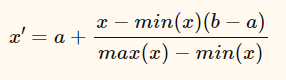

где a и b — это желаемые минимальное и максимальное значения.

**UPD:** вероятно наиболее общим термином следует считать преобразование количественных переменных (numerical data transformation), которое включает в себя:

масштабирование (scaling), т.е. стандартизацию (standartization) и приведение данных к определенному диапазону (min-max scaling)
нелинейные преобразования (non-linear transformations)
нормализацию (normalization), т.е. приведение отдельных наблюдений к единичной норме (scaling individual samples to have unit norm)